In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import quad


/Users/shocks/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
from solar import load_solars

neutrinos = load_solars()

In [3]:
Ers = np.logspace(-1, 5, 100) # keV

## Standard Model

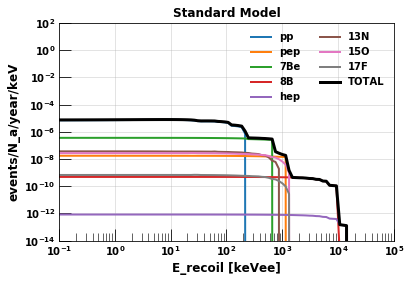

In [4]:
SM_sum = None
for nu in neutrinos:
    dRdE = nu.dRdE_SM(Ers)
    if SM_sum is None:
        SM_sum = dRdE
    else:
        SM_sum += dRdE
    plt.plot(Ers, dRdE, label=nu.label)
    
plt.plot(Ers, SM_sum, color='k', linewidth=3, label='TOTAL')
plt.yscale('log')
plt.xlim(1e-1, 1e5)
plt.xscale('log')
plt.ylim(1e-14, 1e2)
plt.ylabel('events/N_a/year/keV')
plt.xlabel("E_recoil [keVee]")
plt.legend(ncol=2)
plt.title("Standard Model")
plt.grid()
plt.show()

## Neutrino Magnetic Moment

See Kopp et. al. _Exploring neutrino signals in dark matter detectors_

In [5]:
xe1t_background = 70 # events/ton/year/keV
# convert to to events/mol_electrons/year/keV
xe1t_background = xe1t_background * (1e-6) * 131.3 / 54

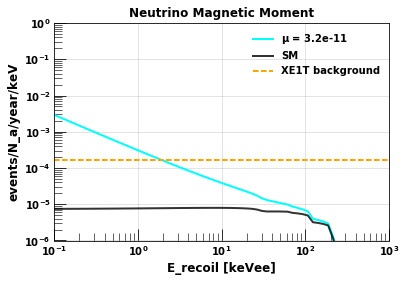

In [6]:
Ers = np.logspace(-1, 5, 100) # keV

mu = 0.32e-10
#mu = 0.5e-10
# add onto the SM "Background"
numu_sum = SM_sum.copy()
for nu in neutrinos:
    dRdE = nu.dRdE_numu(Ers, mu)
    if numu_sum is None:
        numu_sum = dRdE
    else:
        numu_sum += dRdE
    #plt.plot(Ers, dRdE, label=nu.label)
    
plt.plot(Ers, numu_sum, color='cyan', label='$\mu$ = %0.1e' % mu)
plt.plot(Ers, SM_sum, color='black', alpha=0.8, label='SM')
plt.axhline(xe1t_background, color='orange', linestyle='dashed', label='XE1T background')
plt.yscale('log')
plt.xlim(1e-1, 1e3)
plt.xscale('log')
plt.ylim(1e-6, 1e0)
plt.ylabel('events/N_a/year/keV')
plt.xlabel("E_recoil [keVee]")
plt.legend()
plt.title("Neutrino Magnetic Moment")
plt.grid()
plt.show()

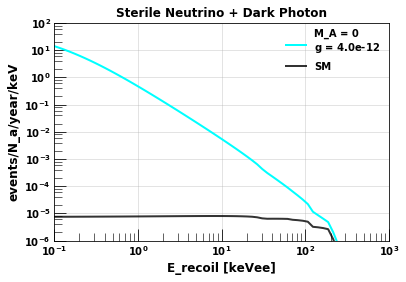

In [7]:
Ers = np.logspace(-1, 5, 100) # keV

M_A = 10e-3 # keV
gg = 4e-12

#mu = 0.5e-10
# add onto the SM "Background"
BminusL_sum = SM_sum.copy()
for nu in neutrinos:
    dRdE = nu.dRdE_BminusL(Ers, np.sqrt(gg), M_A)
    if BminusL_sum is None:
        BminusL_sum = dRdE
    else:
        BminusL_sum += dRdE
    #plt.plot(Ers, dRdE, label=nu.label)
    
plt.plot(Ers, BminusL_sum, color='cyan', label='M_A = %d\n$g$ = %0.1e' % (M_A, gg))
plt.plot(Ers, SM_sum, color='black', alpha=0.8, label='SM')
#plt.axhline(xe1t_background, color='orange', linestyle='dashed', label='XE1T background')
plt.yscale('log')
plt.xlim(1e-1, 1e3)
plt.xscale('log')
plt.ylim(1e-6, 1e2)
plt.ylabel('events/N_a/year/keV')
plt.xlabel("E_recoil [keVee]")
plt.legend()
plt.title("Sterile Neutrino + Dark Photon")
plt.grid()
plt.show()

In [ ]:
def BminusL_diff_xsec(Er_keV, Enu, g, M_A, m_nu=0):
    Er = Er_keV / 1000
    si_corr = (C.hbar * C.c) ** 2
    p2 = Enu ** 2 - m_nu ** 2
    return ( ((g**4 * C.m_e)/(4*np.pi*p2*(M_A**2 + 2*Er*C.m_e)**2)) *
              (2*Enu**2 + Er**2 - 2*Enu*Er - Er*C.m_e - m_nu**2) ) * si_corr


In [ ]:
from solar import SolarBE7, C, max_recoil_energy

nu = SolarBE7()
E, flux = nu.flux[1]

In [ ]:

gg = 4e-12
M_A = 10e-3

BminusL_diff_xsec(E, 0.861, np.sqrt(gg), M_A)

In [ ]:
Ers = np.logspace(-1, 5, 100)

xsec = BminusL_diff_xsec(Ers, E, np.sqrt(gg), M_A) * (Ers <= max_recoil_energy(E))
rate = xsec * flux * 3600 * 24 * 365 * C.N_a / 1000